<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import seaborn as sns
from scipy.special import binom
from scipy import stats
import matplotlib.pyplot as plt

- проверяем гипотезу, что выборка ниже из экспоненциального распределения

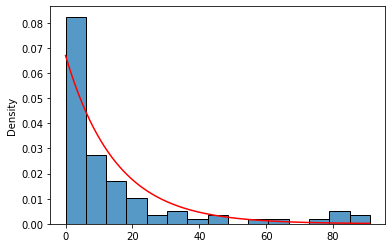

In [6]:
X = np.array([1,1,7,16,8,8,11,7,5,45,13,0,36,15,4,15,7,39,6,91,28,7,0,2, 
              9,2,6,1,4,83,2,3,5,34,1,1,2,0,11,79,2,2,4,1,3,0,2,2,17,55,8, 
              9,20,23,16,3,5,5,4,84,1,20,1,1,20,0,19,17,5,66,0,2,5,1,26, 
              14,1,0,9,88,4,11,4,2,1,32,21,2,15,76,44,8,16,12,1,9])
scale_mle = X.mean()
n = X.size

sns.histplot(X, stat='density', label='empirical');

xs = np.arange(X.min(),X.max(),0.1)
plt.plot(xs, stats.expon.pdf(xs, scale=scale_mle), 'red', label='theoretical');

plt.show()

In [7]:
# для разбиения на интервалы выберем в качестве границ теор. квантиили
Q = [0.2,0.4,0.6,0.8]
qs_ = [stats.expon.ppf(q, scale=scale_mle) for q in Q]
qs = np.array([-np.inf]+qs_+[np.inf])

E_ = []
O_ = []

for i in range(5):
    a,b = qs[i], qs[i+1]
    prob = stats.expon.cdf(b, scale=scale_mle) - stats.expon.cdf(a, scale=scale_mle)
    E = n*prob
    O = sum([a<x<=b for x in X])
    
    print(f'P({a:.3f} ≤ X < {b:.3f}) \t= {prob:.3f}, \t Expected={E:.1f}, \t Observed={O}')
    
    E_.append(E)
    O_.append(O)

E_ = np.array(E_)
O_ = np.array(O_)

assert O_.sum() == n

P(-inf ≤ X < 3.333) 	= 0.200, 	 Expected=19.2, 	 Observed=34
P(3.333 ≤ X < 7.630) 	= 0.200, 	 Expected=19.2, 	 Observed=18
P(7.630 ≤ X < 13.687) 	= 0.200, 	 Expected=19.2, 	 Observed=13
P(13.687 ≤ X < 24.041) 	= 0.200, 	 Expected=19.2, 	 Observed=15
P(24.041 ≤ X < inf) 	= 0.200, 	 Expected=19.2, 	 Observed=16


In [8]:
df = 5-1-1
alpha = 0.05

stat_obs = np.sum((O_-E_)**2/E)
pval = 1-stats.chi2.cdf(stat_obs,df=df)


print('stat_crit\t',stats.chi2.ppf(1-alpha,df))
print('stat_obs\t',stat_obs)
print('p-value \t',pval)

# гипотеза отвергается на уровне значимости 5%

stat_crit	 7.814727903251179
stat_obs	 14.937500000000004
p-value 	 0.0018708459755163442
